In [42]:
# import relevant libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report,r2_score,confusion_matrix,mean_absolute_percentage_error as mape
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

In [43]:
# Load the data
raw_data = pd.read_excel('heart_disease_data.xlsx')
raw_data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [44]:
# For further use,making a copy of raw data
df = raw_data.copy()

In [45]:
# getting the top 5
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [46]:
# checking bottom 5
df.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [47]:
# checking the shape
print('Number of Rows:',df.shape[0])
print('Number of Columns:',df.shape[1])

Number of Rows: 303
Number of Columns: 14


In [48]:
# Checking for any duplicate entries
df[df.duplicated(keep = False)]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
163,38,1,2,138,175,0,1,173,0,0.0,2,4,2,1
164,38,1,2,138,175,0,1,173,0,0.0,2,4,2,1


In [49]:
# removing the duplicate entries
df.drop_duplicates(inplace=True)

In [50]:
# ensuring removal of duplicates
df.duplicated().sum()

0

In [51]:
# checking for any missing values
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

No missing values observed

In [52]:
# Getting the entire info of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 302 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       302 non-null    int64  
 1   sex       302 non-null    int64  
 2   cp        302 non-null    int64  
 3   trestbps  302 non-null    int64  
 4   chol      302 non-null    int64  
 5   fbs       302 non-null    int64  
 6   restecg   302 non-null    int64  
 7   thalach   302 non-null    int64  
 8   exang     302 non-null    int64  
 9   oldpeak   302 non-null    float64
 10  slope     302 non-null    int64  
 11  ca        302 non-null    int64  
 12  thal      302 non-null    int64  
 13  target    302 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 35.4 KB


In [53]:
# getting the statstical information
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,302.00000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000
mean,54.42053,0.682119,0.963576,131.602649,246.500000,0.149007,0.526490,149.569536,0.327815,1.043046,1.397351,0.718543,2.314570,0.543046
std,9.04797,0.466426,1.032044,17.563394,51.753489,0.356686,0.526027,22.903527,0.470196,1.161452,0.616274,1.006748,0.613026,0.498970
min,29.00000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.00000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.250000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.50000,1.000000,1.000000,130.000000,240.500000,0.000000,1.000000,152.500000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.00000,1.000000,2.000000,140.000000,274.750000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.00000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


Categorical Features: sex, cp, fbs,restecg,exang,slope,ca,thal

Numerical Features :  age, trestbps,chol,thalach,oldpeak

output/traget : target

## EDA

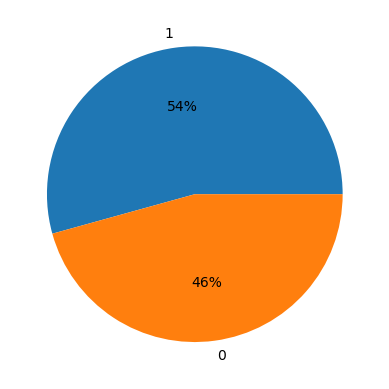

In [54]:
plt.pie(df.target.value_counts(),autopct='%.f%%',labels=df.target.value_counts().index)
plt.show()

From above, we can conclude that target is nearly equally distributed among the two classess.

<AxesSubplot:xlabel='target', ylabel='count'>

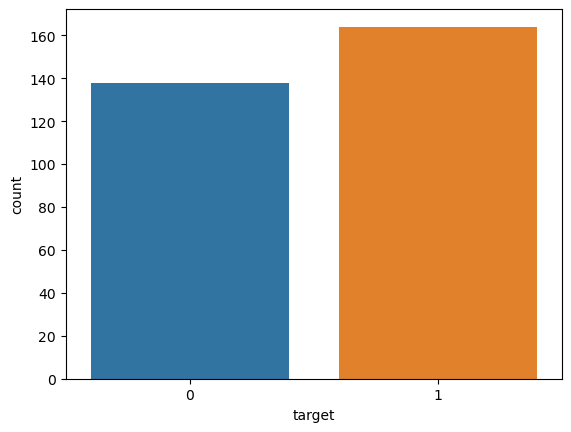

In [55]:
sns.countplot(x=df.target)

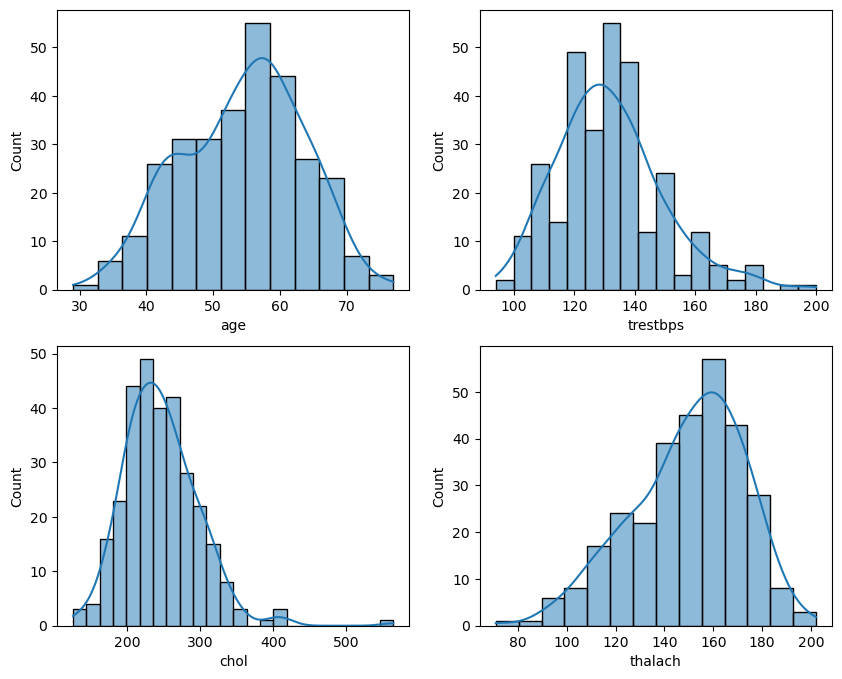

In [56]:
# checking the distribution of numerical features
hist_features = ['age', 'trestbps','chol','thalach']
plt.subplots(figsize = (10,8))
#plt.figure()
for index, col in enumerate(hist_features):
    plt.subplot(2,2,index+1)
    sns.histplot(x = df[col],kde=True)
    plt.xlabel(col)
plt.show()

<AxesSubplot:>

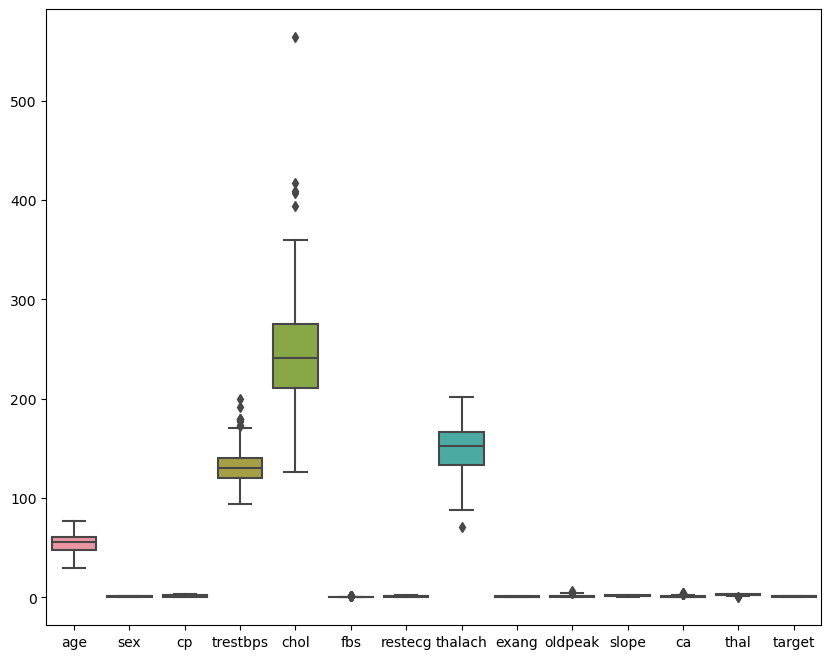

In [57]:
# checking the outliers
plt.figure(figsize = (10,8))
sns.boxplot(data = df)

from above we can see that trestbps, chol & thalach have some outliers

<AxesSubplot:ylabel='oldpeak'>

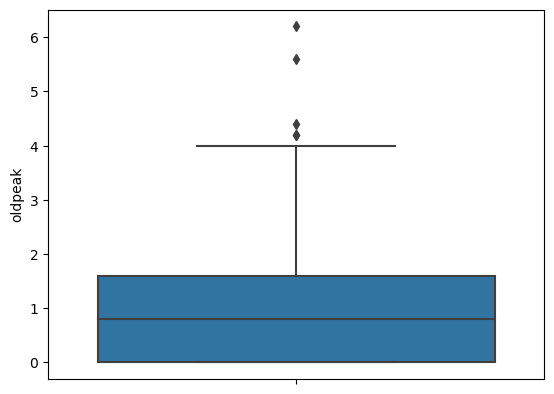

In [58]:
sns.boxplot(y=df.oldpeak)

### Handiling the outliers with Quartile method

#### we will keep the chol datapoints which are less than Q3+1.5IQR

In [65]:
# find the Q3 of chol
chol_Q3 = df.chol.quantile(0.75)
chol_Q3

273.0

In [66]:
# find the chol IQR
chol_IQR = df.chol.quantile(0.75)-df.chol.quantile(0.25)
chol_IQR

62.0

In [41]:
# find the max limit by Q3+1.5IQR
chol_higlim = chol_Q3+1.5*chol_IQR
chol_higlim

370.375

In [64]:
# removing the outliers by selecting the datapoints which are less than the high limit
df = df[df.chol<chol_higlim]
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


<AxesSubplot:xlabel='chol'>

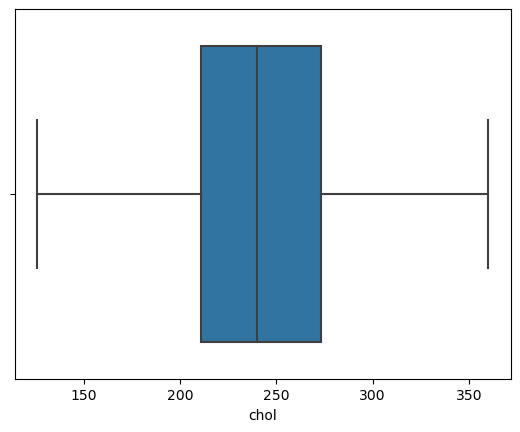

In [68]:
# checking for any outiers in chol
sns.boxplot(x = df.chol)

same as chol outliers, we will remove trestbps outliers also by quartile method

In [69]:
# find the Q3 of trestbps
Q3_trestbps = df.trestbps.quantile(0.75)
Q3_trestbps

140.0

In [70]:
# find the IQR of trestbps by Q3-Q1
IQR_trestbps = Q3_trestbps - df.trestbps.quantile(0.25)
IQR_trestbps

20.0

In [72]:
# get the high limit by using Q3+1.5IQR
trestbps_higlim = Q3_trestbps+(1.5*IQR_trestbps)
trestbps_higlim

170.0

In [75]:
# keep only those elements from trestbps which are less than highlim 
df = df[df.trestbps<trestbps_higlim]
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


<AxesSubplot:ylabel='trestbps'>

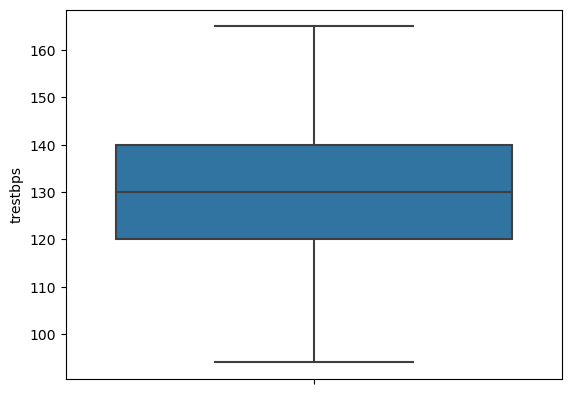

In [77]:
sns.boxplot(y = df.trestbps)

In [81]:
df.oldpeak.unique()

array([2.3, 3.5, 1.4, 0.8, 0.6, 0.4, 1.3, 0. , 1.6, 1.2, 0.2, 1.8, 1. ,
       2.6, 1.5, 0.5, 3. , 2.4, 0.1, 1.9, 1.1, 2. , 0.7, 0.3, 0.9, 3.6,
       3.1, 3.2, 2.5, 2.2, 2.8, 6.2, 5.6, 2.9, 2.1, 4.2, 3.8, 4.4, 4. ,
       3.4])

<AxesSubplot:ylabel='oldpeak'>

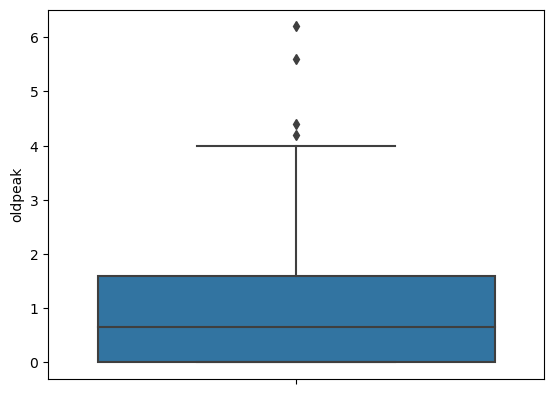

In [78]:
sns.boxplot(y = df.oldpeak)

<AxesSubplot:ylabel='thalach'>

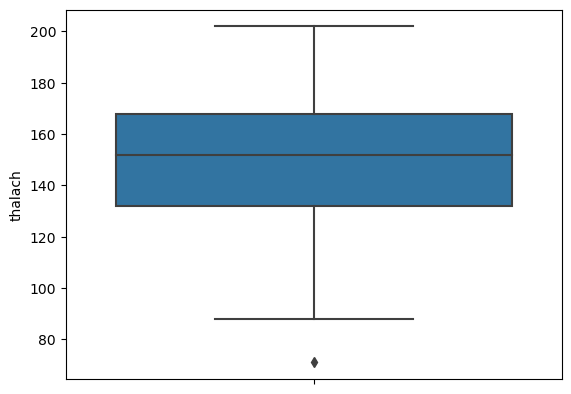

In [82]:
sns.boxplot(y = df.thalach)

In [83]:
df.head(2)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1


In [84]:
# getting all the features
x = df.iloc[:,:-1]

In [85]:
# getting all the targets
y = df.target

In [86]:
# splitting the data for training & testing
x_train,x_test,y_train,y_test = train_test_split(x,y,train_size=0.8,random_state=21)

In [87]:
print(x_train.shape,y_train.shape)

(227, 13) (227,)


In [88]:
print(x_test.shape,y_test.shape)

(57, 13) (57,)


In [89]:
scalar = StandardScaler()
scaled_x_train = scalar.fit_transform(x_train)
scaled_x_test = scalar.transform(x_test)

In [120]:
models = [LogisticRegression(),RandomForestClassifier(),SVC()]

for i in range(3):
    models[i].fit(scaled_x_train, y_train)
    y_pred = models[i].predict(scaled_x_test)

    print(f'{models[i]} : ')
    print('Accuracy : ', models[i].score(scaled_x_test,y_test))
    print('confusion matrix:\n',confusion_matrix(y_test,y_pred))
    
    print()

LogisticRegression() : 
Accuracy :  0.8596491228070176
confusion matrix:
 [[25  5]
 [ 3 24]]

RandomForestClassifier() : 
Accuracy :  0.8421052631578947
confusion matrix:
 [[23  7]
 [ 2 25]]

SVC() : 
Accuracy :  0.8771929824561403
confusion matrix:
 [[25  5]
 [ 2 25]]

